In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




In [10]:
data = pd.read_csv(r'C:\Users\mahbod.k\Desktop\customer data.csv')

In [11]:
data

,CustomerID,Age,Gender,PurchaseAmount,LastPurchaseDays,CustomerTenure,CustomerSegment
0,1,56,Female,594.94,73,126,B
1,2,69,Male,895.86,305,217,C
2,3,46,Male,47.72,344,3378,C
3,4,32,Female,783.50,140,1209,C
4,5,60,Male,203.25,187,3111,C
...,...,...,...,...,...,...,...
495,496,65,Male,101.58,181,390,A
496,497,42,Female,105.42,242,2720,C
497,498,57,Female,79.82,216,1885,B
498,499,62,Male,12.90,251,43,A


In [12]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'PurchaseAmount', 'LastPurchaseDays', 'CustomerTenure']])



# EDA

dar in cell data ra baresi mikonim va KPI ha ra hesab mikonim ke tamayol moshtari ra neshan midahad


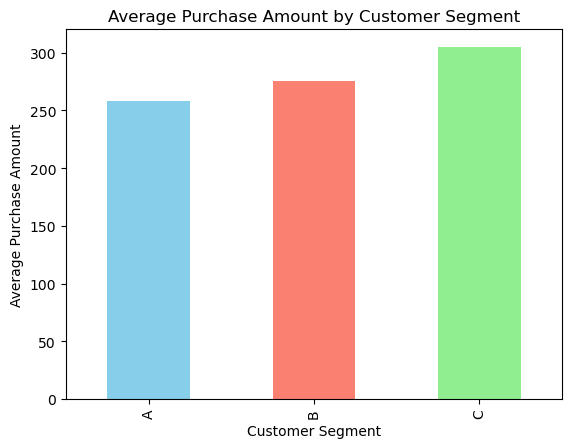

In [13]:
avg_purchase_segment = data.groupby('CustomerSegment')['PurchaseAmount'].mean()
avg_purchase_segment.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Average Purchase Amount by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Purchase Amount')
plt.show()


dar in cell tozi bar asase customer tenure ra moshahede mikonim


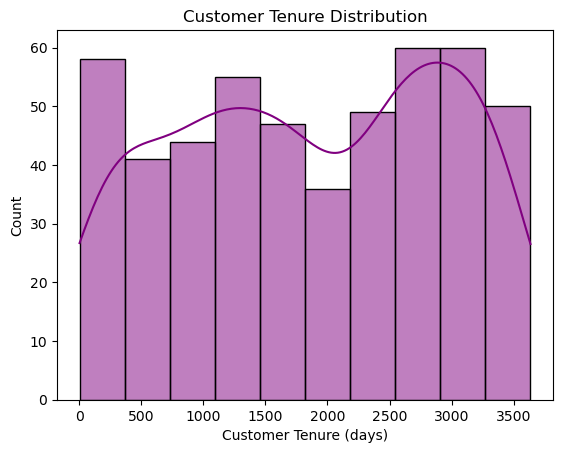

In [14]:
sns.histplot(data['CustomerTenure'], kde=True, color='purple')
plt.title('Customer Tenure Distribution')
plt.xlabel('Customer Tenure (days)')
plt.show()


dar in cell az KMeans baraye clustar kardan data bar asase KPI estefade mikonim va elbow method ra estefade mikonim baraye peyda kardane tedad cluster ha


In [20]:
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\mahbod.k\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


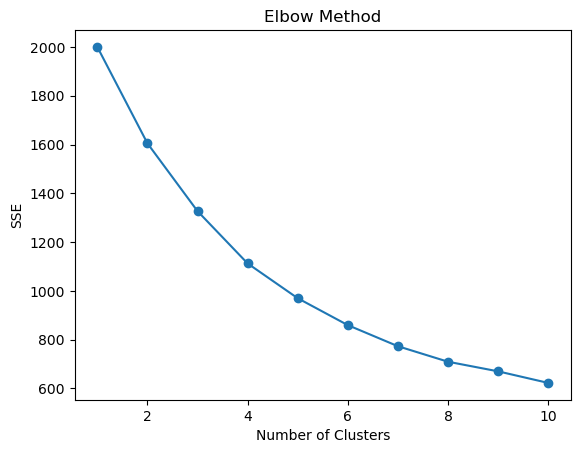

In [16]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


dar in cell, silhouette score ra hesab mikonim baraye behtarin cluster ha


In [21]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print(f'Silhouette Score for k={best_k}: {silhouette_avg}')


Silhouette Score for k=3: 0.2132378240132595


dar in cell graph ha ra bar asase cluster ha mikeshim baraye moshahede tamayol har cluster


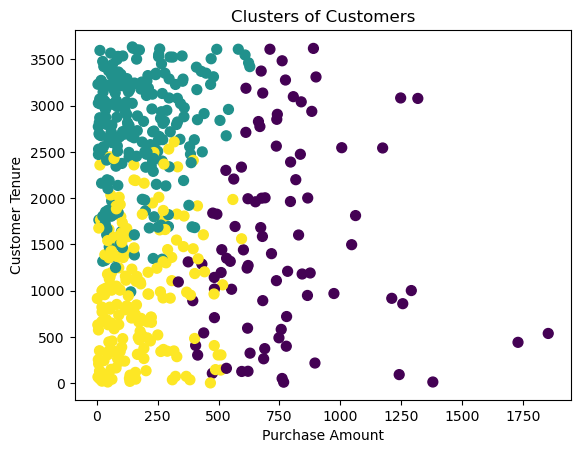

In [23]:
plt.scatter(data['PurchaseAmount'], data['CustomerTenure'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Purchase Amount')
plt.ylabel('Customer Tenure')
plt.title('Clusters of Customers')
plt.show()


dar in cell az decision forest baraye predict kardan KPI estefade mikonim


In [24]:

X = data[['Age', 'Gender', 'LastPurchaseDays', 'CustomerTenure']]
y = (data['PurchaseAmount'] > 300).astype(int)  # Predict if purchase amount > 300


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6866666666666666


dar in cell ahamiyat feature ha ra az model be dast miavarim


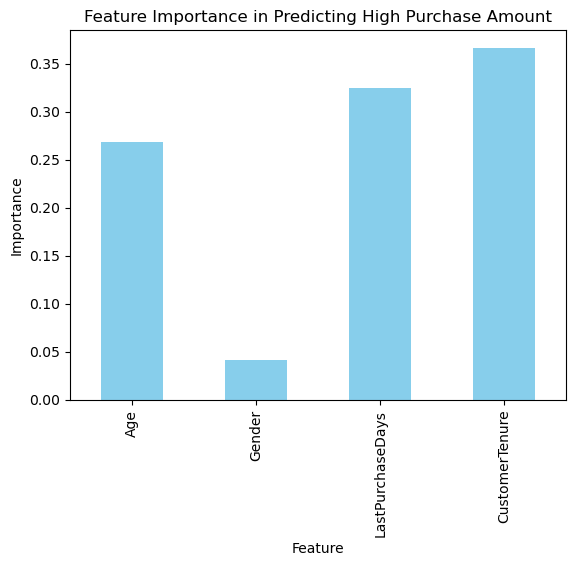

In [25]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance in Predicting High Purchase Amount')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


dar in cell miyangin tedad kharid ra bar asase group-e sin mohasebe mikonim


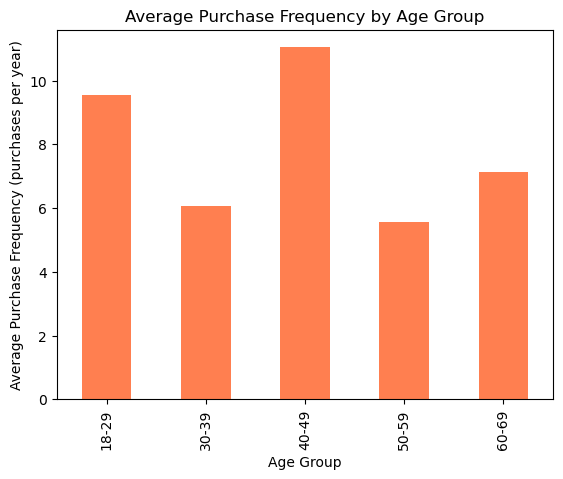

In [26]:
data['PurchaseFrequency'] = 365 / data['LastPurchaseDays']


age_bins = [18, 30, 40, 50, 60, 70]
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=['18-29', '30-39', '40-49', '50-59', '60-69'])
purchase_freq_age_group = data.groupby('AgeGroup')['PurchaseFrequency'].mean()


purchase_freq_age_group.plot(kind='bar', color='coral')
plt.title('Average Purchase Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Frequency (purchases per year)')
plt.show()


dar in cell az data baraye predict kardan churn estefade mikonim


In [27]:

data['Churn'] = ((data['CustomerTenure'] < 365) & (data['PurchaseFrequency'] < 1)).astype(int)


X_churn = data[['Age', 'Gender', 'PurchaseAmount', 'CustomerTenure', 'PurchaseFrequency']]
y_churn = data['Churn']
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X_churn, y_churn, test_size=0.3, random_state=42)


dar in cell az decision forest baraye predict kardan churn estefade mikonim


In [28]:

churn_model = RandomForestClassifier(n_estimators=100, random_state=42)
churn_model.fit(X_train_churn, y_train_churn)
churn_accuracy = churn_model.score(X_test_churn, y_test_churn)
print(f'Churn Prediction Accuracy: {churn_accuracy}')


Churn Prediction Accuracy: 1.0


dar in cell miyangin tenure va purchase amount ra baraye har cluster mohasebe va plot mikonim


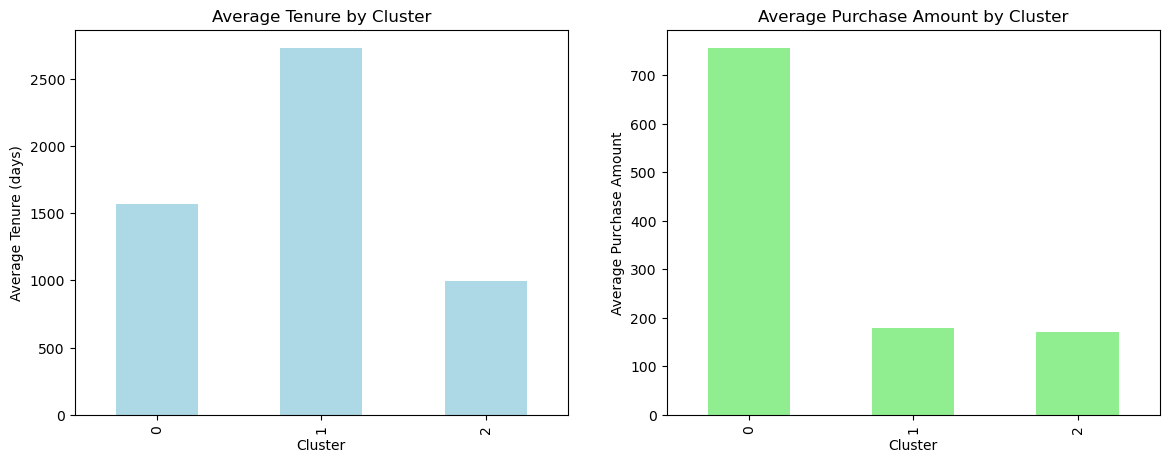

In [32]:

avg_tenure_cluster = data.groupby('Cluster')['CustomerTenure'].mean()
avg_purchase_cluster = data.groupby('Cluster')['PurchaseAmount'].mean()


fig, ax = plt.subplots(1, 2, figsize=(14, 5))

avg_tenure_cluster.plot(kind='bar', ax=ax[0], color='lightblue')
ax[0].set_title('Average Tenure by Cluster')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Average Tenure (days)')

avg_purchase_cluster.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Average Purchase Amount by Cluster')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Average Purchase Amount')

plt.show()


dar in cell az feature haye jadid baraye clustering ba KMeans estefade mikonim


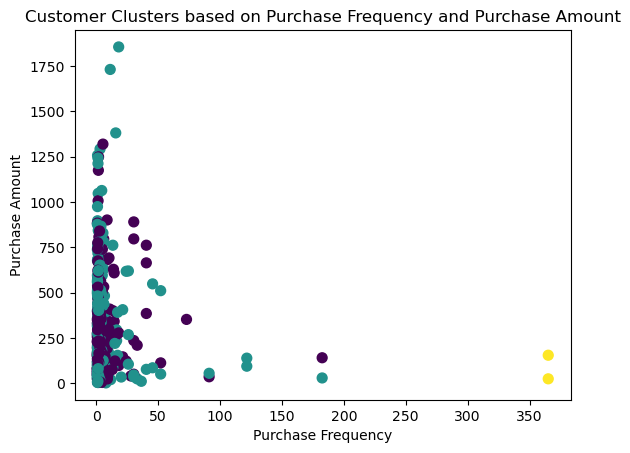

In [33]:

data_new_features = scaler.fit_transform(data[['Age', 'PurchaseAmount', 'PurchaseFrequency', 'CustomerTenure']])
kmeans_new = KMeans(n_clusters=3, random_state=42)
data['NewCluster'] = kmeans_new.fit_predict(data_new_features)

plt.scatter(data['PurchaseFrequency'], data['PurchaseAmount'], c=data['NewCluster'], cmap='viridis', s=50)
plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Amount')
plt.title('Customer Clusters based on Purchase Frequency and Purchase Amount')
plt.show()


dar in cell silhouette score ra baraye cluster haye jadid mohasebe mikonim


In [35]:
silhouette_avg_new = silhouette_score(data_new_features, data['NewCluster'])
print(f'Silhouette Score for New Clustering: {silhouette_avg_new}')


Silhouette Score for New Clustering: 0.2534084940111027
